In [91]:
import sympy
from einsteinpy.symbolic import MetricTensor, ChristoffelSymbols, RiemannCurvatureTensor, RicciTensor, RicciScalar, EinsteinTensor, Schwarzschild
import scipy
from sympy import symbols, sin, simplify
import sympy as sp

from einsteinpy.symbolic.predefined import DeSitter, AntiDeSitter, Minkowski, find

sympy.init_printing()

Documentación: 

https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.htmlDocumentación: 

In [90]:
m = Schwarzschild()

In [19]:
c = sympy.symbols('c')
t, r, theta, phi = sympy.symbols('t r theta phi')

# Definir las funciones T(r) y R(r)
T = sympy.Function('T')(r)
R = sympy.Function('R')(r)

# Definir la métrica
metric = [
    [-c**2 * sympy.exp(2*T), 0, 0, 0], 
    [0, sympy.exp(2*R), 0, 0],
    [0, 0, r**2, 0],
    [0, 0, 0, r**2 * sympy.sin(theta)**2]
]

# Crear objeto MetricTensor
syms = [t, r, theta, phi]
m_obj = MetricTensor(metric, syms)

# Mostrar la métrica
m_obj.tensor()

⎡  2  2⋅T(r)                         ⎤
⎢-c ⋅ℯ           0     0       0     ⎥
⎢                                    ⎥
⎢              2⋅R(r)                ⎥
⎢     0       ℯ        0       0     ⎥
⎢                                    ⎥
⎢                       2            ⎥
⎢     0          0     r       0     ⎥
⎢                                    ⎥
⎢                           2    2   ⎥
⎣     0          0     0   r ⋅sin (θ)⎦

In [20]:
ch = ChristoffelSymbols.from_metric(m_obj)
ch.tensor()

⎡                            ⎡ 2  -2⋅R(r)  2⋅T(r) d         
⎢⎡          d             ⎤  ⎢c ⋅ℯ       ⋅ℯ      ⋅──(T(r))  
⎢⎢   0      ──(T(r))  0  0⎥  ⎢                    dr        
⎢⎢          dr            ⎥  ⎢                              
⎢⎢                        ⎥  ⎢                              
⎢⎢d                       ⎥  ⎢             0                
⎢⎢──(T(r))     0      0  0⎥  ⎢                              
⎢⎢dr                      ⎥  ⎢                              
⎢⎢                        ⎥  ⎢                              
⎢⎢   0         0      0  0⎥  ⎢             0                
⎢⎢                        ⎥  ⎢                              
⎢⎣   0         0      0  0⎦  ⎢                              
⎣                            ⎣             0                

                                          ⎤                 
   0           0                0         ⎥  ⎡0  0  0       
                                          ⎥  ⎢              
                       

In [29]:
rc.tensor()

⎡   ⎛                                    2       2          
⎢ 2 ⎜    d        d            ⎛d       ⎞       d           
⎢c ⋅⎜- r⋅──(R(r))⋅──(T(r)) + r⋅⎜──(T(r))⎟  + r⋅───(T(r)) + 2
⎢   ⎜    dr       dr           ⎝dr      ⎠        2          
⎢   ⎝                                          dr           
⎢───────────────────────────────────────────────────────────
⎢                                           r               
⎢                                                           
⎢                                                           
⎢                                                           
⎢                                                           
⎢                                           0               
⎢                                                           
⎢                                                           
⎢                                                           
⎢                                                           
⎢                       

In [86]:
ricci_sk = RicciScalar.from_christoffels(ch)

In [87]:
ricci_sk

RicciScalar2*(r**2*Derivative(R(r), r)*Derivative(T(r), r) - r**2*Derivative(T(r), r)**2 - r**2*Derivative(T(r), (r, 2)) + 2*r*Derivative(R(r), r) - 2*r*Derivative(T(r), r) + exp(2*R(r)) - 1)*exp(-2*R(r))/r**2

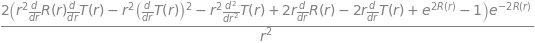

In [34]:
ricci_sk.tensor()

In [61]:
G1 = EinsteinTensor.from_metric(m)

In [65]:
print(G1)

Tensor EinsteinTensor
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]


In [80]:
r, m = sp.symbols('r m')

# Definir las funciones T(r) y R(r)
T = (1/2) * sp.ln(1 - (2 * m / r))
R = -(1/2) * sp.ln(1 - (2 * m / r))

# Calcular las derivadas necesarias
dT_dr = sp.diff(T, r)
d2T_dr2 = sp.diff(dT_dr, r)
dR_dr = sp.diff(R, r)

In [81]:
# Calculo de las derivadas
R_rr = (
    dR_dr * dT_dr -
    dT_dr**2 -
    d2T_dr2 +
    2 * dR_dr / r
)

# Simplificar la expresión
R_rr_simplified = sp.simplify(R_rr)

print("R_rr = ")
R_rr_simplified

R_rr = 


In [85]:
R_tt = dR_dr * dT_dr - (dR_dr)**2 - d2T_dr2 + (2*dR_dr)/r
R_tt_simplified = sp.simplify(R_tt)
print("R_t= t", R_tt_simplified)

R_t= t 0
